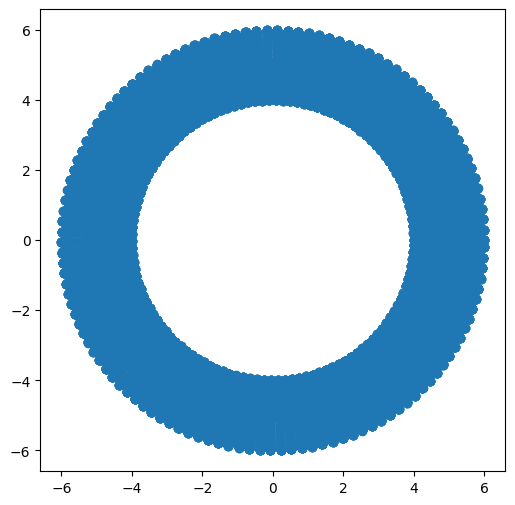

In [20]:
import numpy as np
import matplotlib.pyplot as plt

R = 5
r = 1

# trace out the circle
thetas = np.arange(0, 2 * np.pi, 0.05)
circle = np.array([
    r * np.cos(thetas),
    np.zeros(thetas.shape),
    r * np.sin(thetas)
])

# set up the normals for the circle
normals = circle.copy() / r

# offset the circle
circle[0] += 5

# trace out the torus
def rotation_matrix(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    m = np.zeros((len(theta),3,3))
    m[:,2,2] = 1
    m[:,:2,:2] = np.array([
        [c,-s],
        [s,c],
    ]).transpose(2,0,1)
    return m

m = rotation_matrix(thetas)

torus = (m @ circle).transpose(0,2,1).reshape(-1,3)

# set up the normals for the torus
normals = (m @ normals).transpose(0,2,1).reshape(-1,3)

plt.figure(figsize=(6,6))
plt.scatter(torus[:,0], torus[:,1])
plt.show()

In [21]:
torus.shape

(15876, 3)

In [22]:
normals.shape

(15876, 3)

In [27]:
def X_rotation_matrix(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    m = np.zeros((len(theta),3,3))
    m[:,0,0] = 1
    m[:,1:,1:] = np.array([
        [c,-s],
        [s,c],
    ]).transpose(2,0,1)
    return m

torus = torus @ X_rotation_matrix([0.3])[0]
normals = normals @ X_rotation_matrix([0.3])[0]

In [28]:
torus.shape

(15876, 3)

In [29]:
normals.shape

(15876, 3)

/tmp/ipykernel_25330/4197517417.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


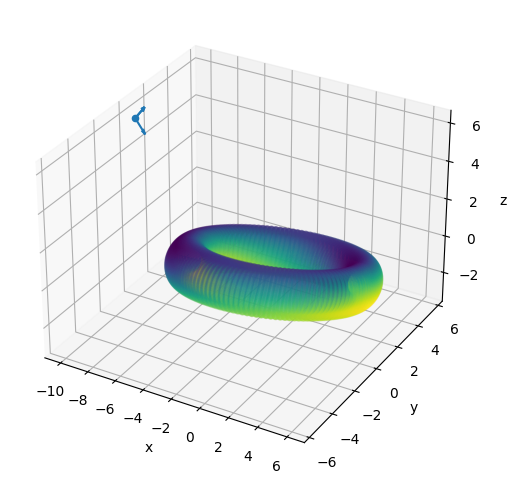

In [30]:
# set up camera
camera = np.array([-10,0,6])
screen_distance = 1
view_direction = np.array([1,0,-1])
view_direction = view_direction / np.linalg.norm(view_direction)

# set up light source
light_direction = np.array([0,-4,-1])

# the plane of the screen is described by two vectors, both orthogonal to the viewing direction
# the left-right vector must be orthogonal to the viewing direction and z-axis
lr = np.cross(view_direction, np.array([0,0,1]))
lr = lr / np.linalg.norm(lr)

# the top-bottom axis must be orthonormal to the left_right axis and viewing direction
tb = np.cross(lr, view_direction)
tb = tb / np.linalg.norm(tb)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(torus[:,0], torus[:,1], torus[:,2], alpha=0.1, c=normals @ view_direction)
ax.scatter(*camera)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.quiver(*camera, *view_direction)
ax.quiver(*camera, *tb)
ax.quiver(*camera, *tb)
fig.show()

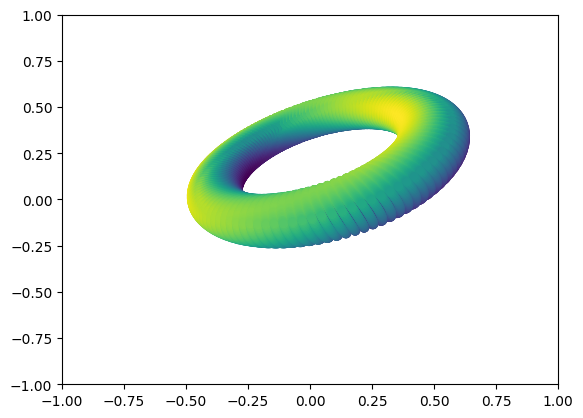

In [31]:
# project the torus on the screen
proj_tb = screen_distance * ((torus - camera) @ tb) / ((torus - camera) @ view_direction)
proj_lr = screen_distance * ((torus - camera) @ lr) / ((torus - camera) @ view_direction)

shading = -(normals @ light_direction)
shading = shading + shading.min()
distance_to_camera = torus @ view_direction
order = (-distance_to_camera).argsort()

plt.scatter(proj_lr[order], proj_tb[order], c=shading[order])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

In [32]:
screen = np.empty((70,25), dtype='str')
screen[:] = ' '
greyscale =  ' .:-=+*#%@'

digital_lr = np.digitize(proj_lr, np.linspace(-1,1,screen.shape[0]))
digital_tb = np.digitize(proj_tb, np.linspace(-1,1,screen.shape[1]))
digital_shading = np.digitize(shading, np.linspace(shading.min(),shading.max(), 10)) - 1

for x, y, shade in zip(digital_lr[order], digital_tb[order], digital_shading[order]):
    screen[x,y] = greyscale[shade]

for row in np.flip(screen.T, axis=0):
    print(''.join(row))

                                                                      
                                                                      
                                                                      
                                                                      
                                             **++                     
                                  ########%%%%%%%%##*+=               
                             **++****#####%%%%%%%%%#*+==-             
                         #+====+++++++===++++*#%%##*++==-.            
                      #+==-:---:::            %##**++==-:.            
                    #++=:. .               ###***++==--:.             
                   ##*+-:             #####***++=====::.              
                   %##****+++**######*****+++++===--:.                
                   %%###########******+++++=+==-:-:                   
                   %%########*******+*+++==---:                       
      

In [373]:
from IPython.display import clear_output
import time

for i in range(0,1,100):
    camera = np.array([-10,i,6])
    screen_distance = 1
    view_direction = np.array([1,0,-1])
    view_direction = view_direction / np.linalg.norm(view_direction)

    # set up light source
    light_direction = np.array([0,-4,-1])

    # the plane of the screen is described by two vectors, both orthogonal to the viewing direction
    # the left-right vector must be orthogonal to the viewing direction and z-axis
    lr = np.cross(view_direction, np.array([0,0,1]))
    lr = lr / np.linalg.norm(lr)

    # the top-bottom axis must be orthonormal to the left_right axis and viewing direction
    tb = np.cross(lr, view_direction)
    tb = tb / np.linalg.norm(tb)

    # project the torus on the screen
    proj_tb = screen_distance * ((torus - camera) @ tb) / ((torus - camera) @ view_direction)
    proj_lr = screen_distance * ((torus - camera) @ lr) / ((torus - camera) @ view_direction)

    # calculate shading for every point
    shading = -(normals @ light_direction)
    shading = shading + shading.min()

    # sort the points on distance to camera so only the closest points are shown
    distance_to_camera = torus @ view_direction
    order = (-distance_to_camera).argsort()

    # set up the screen
    screen = np.empty((150,60), dtype='str')
    screen[:] = ' '
    greyscale =  ' .:-=+*#%@'

    # convert x, y and shading to digital values
    digital_lr = np.digitize(proj_lr, np.linspace(-1,1,screen.shape[0]))
    digital_tb = np.digitize(proj_tb, np.linspace(-1,1,screen.shape[1]))
    digital_shading = np.digitize(shading, np.linspace(shading.min(),shading.max(), 10)) - 1

    # fill the screen
    for x, y, shade in zip(digital_lr[order], digital_tb[order], digital_shading[order]):
        screen[x,y] = greyscale[shade]

    clear_output(wait=True)


    # print to terminal
    for row in np.flip(screen.T, axis=0):
        print(''.join(row))

    time.sleep(1)



In [372]:
for i in range(100):
    clear_output(wait=True)
    print(i)
    time.sleep(0.5)

11


KeyboardInterrupt: 